In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def spherical_to_cartesian(radius, theta, phi):
    """
    将球面坐标转换为笛卡尔坐标。
    radius: 半径
    theta: 方位角
    phi: 仰角
    """
    x = radius * np.sin(phi) * np.cos(theta)
    y = radius * np.sin(phi) * np.sin(theta)
    z = radius * np.cos(phi)
    return x, y, z

def get_position_encoding_matrix(rows, cols):
    """
    生成位置编码矩阵，每个元素由三维向量表示。
    rows: 矩阵行数
    cols: 矩阵列数
    """
    position_encoding_matrix = np.zeros((rows, cols, 3))
    radius = 1  # 单位球

    for i in range(rows):
        for j in range(cols):
            theta = (j / (cols - 1)) * (np.pi / 2)  # 方位角从0到π/2
            phi = (i / (rows - 1)) * (np.pi / 2)    # 仰角从0到π/2
            x, y, z = spherical_to_cartesian(radius, theta, phi)
            position_encoding_matrix[i, j] = [x, y, z]

    return position_encoding_matrix

In [3]:
rows = 28
cols = 28
position_encoding_matrix = get_position_encoding_matrix(rows, cols)

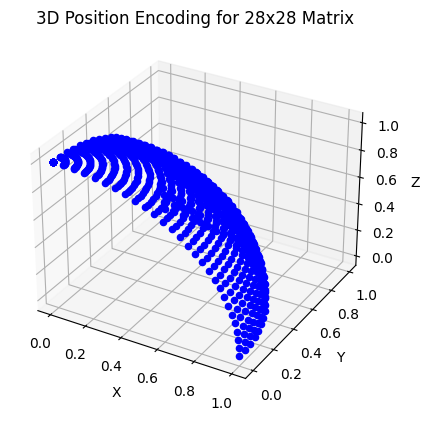

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(rows):
    for j in range(cols):
        x, y, z = position_encoding_matrix[i, j]
        ax.scatter(x, y, z, color='b')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title("3D Position Encoding for 28x28 Matrix")
plt.show()